In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 

path = r'E:\career\Dataa\github\Machine-Learning-Courses\Machine-Learning-Course-Andrew-Ng\machine-learning-assignments\ex1'
os.chdir(path)

- ex1.mlx - MATLAB Live Script that steps you through the exercise
- ex1data1.txt - Dataset for linear regression with one variable
- ex1data2.txt - Dataset for linear regression with multiple variables
- submit.m - Submission script that sends your solutions to our servers


- *plotData.m - Function to display the dataset
- *computeCost.m - Function to compute the cost of linear regression
- *gradientDescent.m - Function to run gradient descent
- **computeCostMulti.m - Cost function for multiple variables
- **gradientDescentMulti.m - Gradient descent for multiple variables
- **featureNormalize.m - Function to normalize features
- **normalEqn.m - Function to compute the normal equations

In [2]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

In [3]:
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


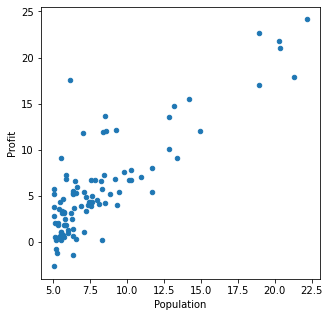

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5));

In [6]:
#column 1
data.insert(0, 'Ones', 1)

In [7]:
data.head(10)

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233
5,1,8.3829,11.8860
6,1,7.4764,4.3483
7,1,8.5781,12.0000
8,1,6.4862,6.5987
9,1,5.0546,3.8166


In [8]:
data.shape[1]

3

In [9]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1] # : all rows -- 0:cols-1 features 
y = data.iloc[:,cols-1:cols] # : all rows -- 0:cols-1 Y


In [10]:
print('X data = \n' ,X.head(10) )
print('y data = \n' ,y.head(10) )

X data = 
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
5     1      8.3829
6     1      7.4764
7     1      8.5781
8     1      6.4862
9     1      5.0546
y data = 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


In [11]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [12]:
print('X.shape = ' , X.shape)
print('X \n',X)


X.shape =  (97, 2)
X 
 [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.   

In [13]:
print('theta \n',theta)
print('theta.shape = ' , theta.shape)

theta 
 [[0 0]]
theta.shape =  (1, 2)


In [14]:
print('y.shape = ' , y.shape)
print('y \n',y)


y.shape =  (97, 1)
y 
 [[17.592  ]
 [ 9.1302 ]
 [13.662  ]
 [11.854  ]
 [ 6.8233 ]
 [11.886  ]
 [ 4.3483 ]
 [12.     ]
 [ 6.5987 ]
 [ 3.8166 ]
 [ 3.2522 ]
 [15.505  ]
 [ 3.1551 ]
 [ 7.2258 ]
 [ 0.71618]
 [ 3.5129 ]
 [ 5.3048 ]
 [ 0.56077]
 [ 3.6518 ]
 [ 5.3893 ]
 [ 3.1386 ]
 [21.767  ]
 [ 4.263  ]
 [ 5.1875 ]
 [ 3.0825 ]
 [22.638  ]
 [13.501  ]
 [ 7.0467 ]
 [14.692  ]
 [24.147  ]
 [-1.22   ]
 [ 5.9966 ]
 [12.134  ]
 [ 1.8495 ]
 [ 6.5426 ]
 [ 4.5623 ]
 [ 4.1164 ]
 [ 3.3928 ]
 [10.117  ]
 [ 5.4974 ]
 [ 0.55657]
 [ 3.9115 ]
 [ 5.3854 ]
 [ 2.4406 ]
 [ 6.7318 ]
 [ 1.0463 ]
 [ 5.1337 ]
 [ 1.844  ]
 [ 8.0043 ]
 [ 1.0179 ]
 [ 6.7504 ]
 [ 1.8396 ]
 [ 4.2885 ]
 [ 4.9981 ]
 [ 1.4233 ]
 [-1.4211 ]
 [ 2.4756 ]
 [ 4.6042 ]
 [ 3.9624 ]
 [ 5.4141 ]
 [ 5.1694 ]
 [-0.74279]
 [17.929  ]
 [12.054  ]
 [17.054  ]
 [ 4.8852 ]
 [ 5.7442 ]
 [ 7.7754 ]
 [ 1.0173 ]
 [20.992  ]
 [ 6.6799 ]
 [ 4.0259 ]
 [ 1.2784 ]
 [ 3.3411 ]
 [-2.6807 ]
 [ 0.29678]
 [ 3.8845 ]
 [ 5.7014 ]
 [ 6.7526 ]
 [ 2.0576 ]
 [ 0.47953]
 [ 0.

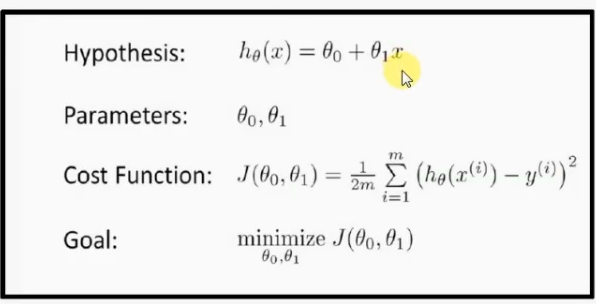

- X ------- m *(n+1)
- $\theta$ ------- 1*(n+1)
- X * theta.T ------- m *(n+1) X (n+1)*1 ----- m * 1
- y m*1
- z >>> (X * theta.T) - y) >>>> m*1
- z^2 >>>>> || (X * theta.T) - y) || 

In [17]:
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
#    print('z \n',z)
#    print('m ' ,len(X))
    return np.sum(z) / (2 * len(X))

In [18]:
print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

computeCost(X, y, theta) =  32.072733877455676


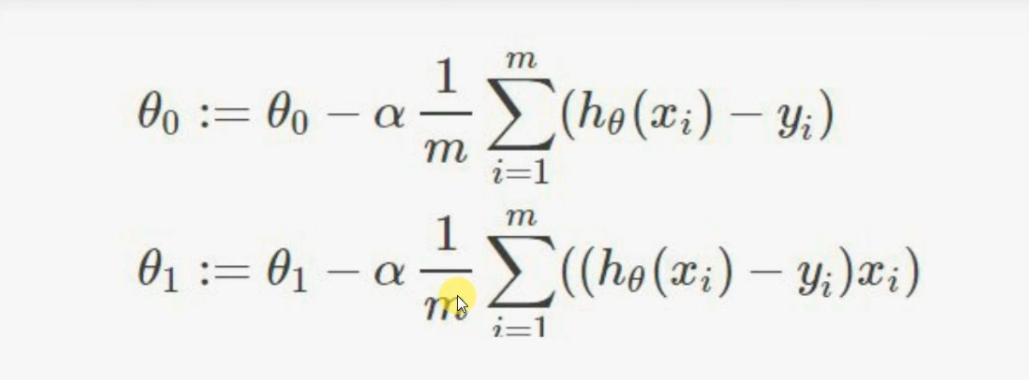

In [20]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #1Xn
    parameters = int(theta.ravel().shape[1]) #1Xn
    cost = np.zeros(iters) #iters
    
    for i in range(iters):
        error = (X * theta.T) - y #m X (n+1) * (n+1) X 1 ----- m X 1
        
        for j in range(parameters): #j >>> n 0 , 1 , 2 
            term = np.multiply(error, X[:,j]) #m X 1 * m X 1 this is multiply not matrix maltiply >>> mx1
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #sum for all M in Mx1
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [21]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

In [22]:
# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [23]:
print('g the final theata = ' , g)
print('cost all cost in the way to the end = ' , cost[0:50] )
print('computeCost final cost  = ' , computeCost(X, y, g))

g the final theata =  [[-3.24140214  1.1272942 ]]
cost all cost in the way to the end =  [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257]
computeCost final cost  =  4.515955503078912


In [44]:
# get best fit line
x = np.linspace(data.Population.min(), data.Population.max(), 97) #تقسيم اللى الف جزء 

In [45]:
print('x \n',x)

x 
 [ 5.0269      5.20581771  5.38473542  5.56365313  5.74257083  5.92148854
  6.10040625  6.27932396  6.45824167  6.63715938  6.81607708  6.99499479
  7.1739125   7.35283021  7.53174792  7.71066563  7.88958333  8.06850104
  8.24741875  8.42633646  8.60525417  8.78417188  8.96308958  9.14200729
  9.320925    9.49984271  9.67876042  9.85767812 10.03659583 10.21551354
 10.39443125 10.57334896 10.75226667 10.93118438 11.11010208 11.28901979
 11.4679375  11.64685521 11.82577292 12.00469063 12.18360833 12.36252604
 12.54144375 12.72036146 12.89927917 13.07819687 13.25711458 13.43603229
 13.61495    13.79386771 13.97278542 14.15170313 14.33062083 14.50953854
 14.68845625 14.86737396 15.04629167 15.22520938 15.40412708 15.58304479
 15.7619625  15.94088021 16.11979792 16.29871562 16.47763333 16.65655104
 16.83546875 17.01438646 17.19330417 17.37222188 17.55113958 17.73005729
 17.908975   18.08789271 18.26681042 18.44572813 18.62464583 18.80356354
 18.98248125 19.16139896 19.34031667 19.5192343

In [26]:
print('g the final theta \n',g)


g the final theta 
 [[-3.24140214  1.1272942 ]]


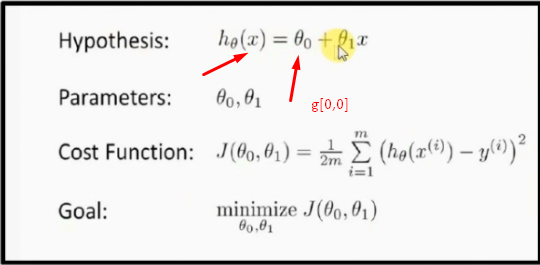

In [ ]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5));
ax.plot(np.arange(iters), cost, 'r');
ax.set_xlabel('Iterations');
ax.set_ylabel('Cost');
ax.set_title('Error vs. Training Epoch');

# to any number of features 


In [65]:
#read data    
data = pd.read_csv('ex1data1.txt', header=None)


In [66]:
# rescaling data
data = (data - data.mean()) / data.std()


In [67]:

# add ones column
data.insert(0, 'Ones', 1) #insert theta 0


In [68]:
cols = data.shape[1]
cols

3

In [69]:
data

,Ones,0,1
0,1,-0.529654,2.132905
1,1,-0.680150,0.597261
2,1,0.092716,1.419690
3,1,-0.298872,1.091575
4,1,-0.594333,0.178606
...,...,...,...
92,1,-0.591517,0.247495
93,1,-0.737593,-0.699102
94,1,0.034523,-1.033453
95,1,1.352547,0.583632


In [72]:
#read data    
data = pd.read_csv('ex1data1.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

# rescaling data
data = (data - data.mean()) / data.std()

# add ones column
data.insert(0, 'Ones', 1) #insert theta 0

# separate X (training data) from y (target variable)
cols = data.shape[1] #number of cols 
X = data.iloc[:,0:cols-1] #all but last col n the features 
Y = data.iloc[:,cols-1:cols] #the last col the wanted value 

# convert to matrices and initialize theta
X = np.matrix(X.values) # M X n+1
Y = np.matrix(Y.values) # M * 1 
theta = np.zeros((1,cols-1))
np.matrix.flatten(theta)
# initialize variables for learning rate and iterations
alpha = 0.1
iters = 100


def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))



In [75]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [79]:
# perform linear regression on the data set
finaltheta, allcost = gradientDescent(X, Y, theta, alpha, iters)

IndexError: tuple index out of range

In [78]:
# get the cost (error) of the model
finalcost = computeCost(X, y, finaltheta)

print('final theta = ' , finaltheta)
print('all costs  = ' , allcost[0:50] )
print('Final cost = ' , finalcost)

NameError: name 'finaltheta' is not defined

In [ ]:
#normal steps general 

data.insert(0, 'Ones', 1) #insert theta 0
cols = data.shape[1] #number of cols 
X = data.iloc[:,0:cols-1] #all but last col n the features 
y = data.iloc[:,cols-1:cols] #the last col the wanted value 


X = np.matrix(X.values) # M X n+1
y = np.matrix(y.values) # M * 1 
theta = np.zeros((1,cols-1))


# initialize variables for learning rate and iterations
alpha = 0.1
iters = 100
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
thiscost = computeCost(X2, y2, g2)

In [ ]:
print('final theta = ' , g2)
print('all costs  = ' , cost2[0:50] )
print('Final cost = ' , thiscost)

In [ ]:
# get best fit line for Size vs. Price

x = np.linspace(data2.Size.min(), data2.Size.max(), 100)
h_x = g2[0, 0] + (g2[0, 1] * x)


In [ ]:
# draw the line for Size vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, h_x, 'r', label='Prediction')
ax.scatter(data2.Size, data2.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

In [ ]:
# get best fit line for Bedrooms vs. Price

x = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)
print('x \n',x)
print('g \n',g2)

h_x = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)

# draw the line  for Bedrooms vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, h_x, 'r', label='Prediction')
ax.scatter(data2.Bedrooms, data2.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Bedrooms vs. Price')

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [ ]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

In [ ]:
data2.head(10)

In [ ]:
data2.describe()

In [ ]:
# rescaling data
data2 = (data2 - data2.mean()) / data2.std()

In [ ]:
print('data after normalization = ')
print(data2.head(10) )

data = 
   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500

data.describe = 
              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000

data after normalization = 
       Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
5 -0.019732  1.090417 -0.323998
6 -0.587240 -0.223675 -0.20403

Text(0.5, 1.0, 'Error vs. Training Epoch')

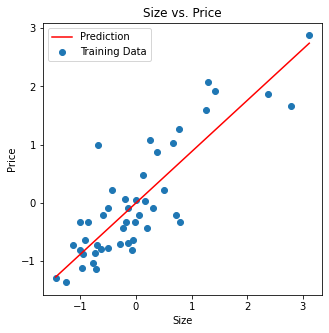

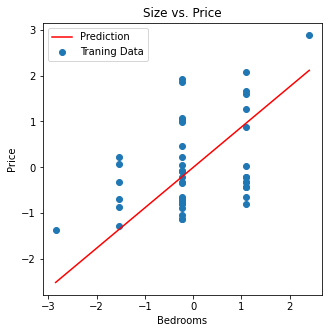

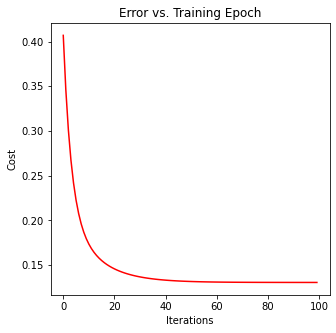

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

data.insert(0, 'Ones', 1)


cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]


X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

#=============================================================

#read data    
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

#show data
print('data = ')
print(data2.head(10) )
print()
print('data.describe = ')
print(data2.describe())

# rescaling data
data2 = (data2 - data2.mean()) / data2.std()

print()
print('data after normalization = ')
print(data2.head(10) )


# add ones column
data2.insert(0, 'Ones', 1)


# separate X (training data) from y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]


print('**************************************')
print('X2 data = \n' ,X2.head(10) )
print('y2 data = \n' ,y2.head(10) )
print('**************************************')


# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))


print('X2 \n',X2)
print('X2.shape = ' , X2.shape)
print('**************************************')
print('theta2 \n',theta2)
print('theta2.shape = ' , theta2.shape)
print('**************************************')
print('y2 \n',y2)
print('y2.shape = ' , y2.shape)
print('**************************************')


# initialize variables for learning rate and iterations
alpha = 0.1
iters = 100

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
thiscost = computeCost(X2, y2, g2)


print('g2 = ' , g2)
print('cost2  = ' , cost2[0:50] )
print('computeCost = ' , thiscost)
print('**************************************')


# get best fit line for Size vs. Price

x = np.linspace(data2.Size.min(), data2.Size.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)

# draw the line for Size vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Size, data2.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')


# get best fit line for Bedrooms vs. Price

x = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)

# draw the line  for Bedrooms vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Bedrooms, data2.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')



# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# التطبيق الأول :  القسم الثاني  , التوقع باستخدام متغير واحد B18

data = 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
**************************************
data.describe = 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
**************************************
new data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166
**************************************
**********

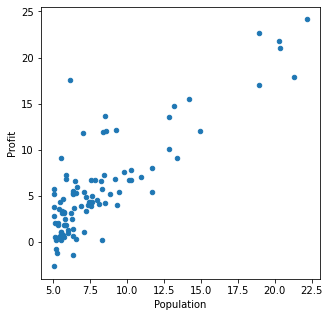

In [86]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read data

data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

#show data details
print('data = \n' ,data.head(10) )
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

#=========================================================================

# adding a new column called ones before the data
data.insert(0, 'Ones', 1)
print('new data = \n' ,data.head(10) )
print('**************************************')


# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

print('**************************************')
print('X data = \n' ,X.head(10) )
print('y data = \n' ,y.head(10) )
print('**************************************')



# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros((1,cols-1)))
np.matrix.flatten(theta)
                  
print('X \n',X)
print('X.shape = ' , X.shape)
print('theta \n',theta)
print('theta.shape = ' , theta.shape)
print('y \n',y)
print('y.shape = ' , y.shape)
print('**************************************')

#=========================================================================

computeCost(X, y, theta) =  4.515955503078912
**************************************
g =  [[-3.78806857  1.18221277]]
cost  =  [4.51581508 4.51567517 4.51553576 4.51539686 4.51525845 4.51512054
 4.51498313 4.51484621 4.51470979 4.51457386 4.51443842 4.51430346
 4.514169   4.51403501 4.51390151 4.51376849 4.51363595 4.51350389
 4.5133723  4.51324118 4.51311054 4.51298037 4.51285067 4.51272143
 4.51259266 4.51246436 4.51233651 4.51220913 4.51208221 4.51195574
 4.51182973 4.51170417 4.51157907 4.51145441 4.5113302  4.51120645
 4.51108313 4.51096026 4.51083784 4.51071585 4.51059431 4.5104732
 4.51035253 4.51023229 4.51011249 4.50999311 4.50987417 4.50975566
 4.50963757 4.50951991]
computeCost =  4.4780276098799705
**************************************
x 
 [ 5.0269      5.20039596  5.37389192  5.54738788  5.72088384  5.8943798
  6.06787576  6.24137172  6.41486768  6.58836364  6.7618596   6.93535556
  7.10885152  7.28234747  7.45584343  7.62933939  7.80283535  7.97633131
  8.14982727  8.323

Text(0.5, 1.0, 'Error vs. Training Epoch')

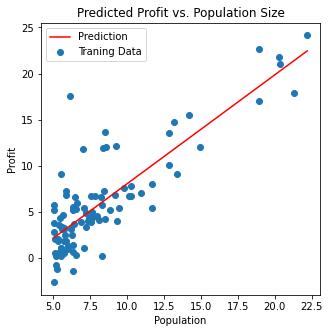

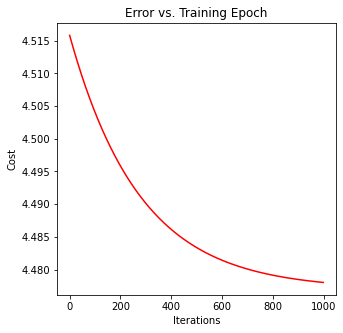

In [88]:
# cost function
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
#    print('z \n',z)
#    print('m ' ,len(X))
    return np.sum(z) / (2 * len(X))

print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

print('**************************************')


# GD function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
theta, cost = gradientDescent(X, y, theta, alpha, iters)

print('Final theta = ' , theta)
print('all cost  = ' , cost[0:50] )
print('final cost = ' , computeCost(X, y, theta))
print('**************************************')


#=========================================================================

# get best fit line

x = np.linspace(data.Population.min(), data.Population.max(), 100)
print('x \n',x)
print('g \n',theta)

f = theta[0, 0] + (theta[0, 1] * x)
print('f \n',f)




# draw the line

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')


# final solution

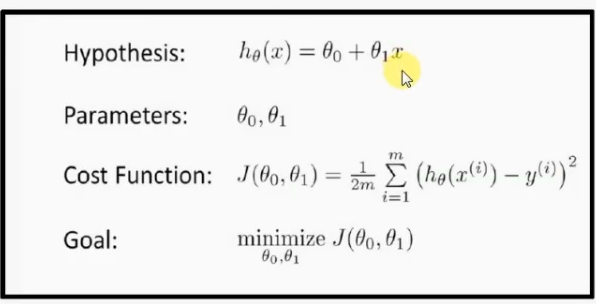

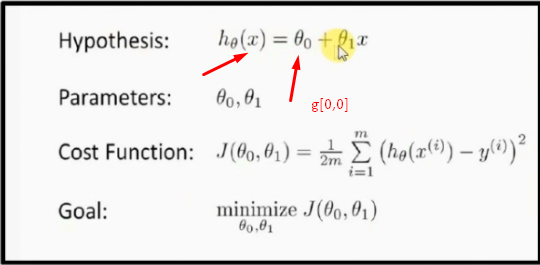

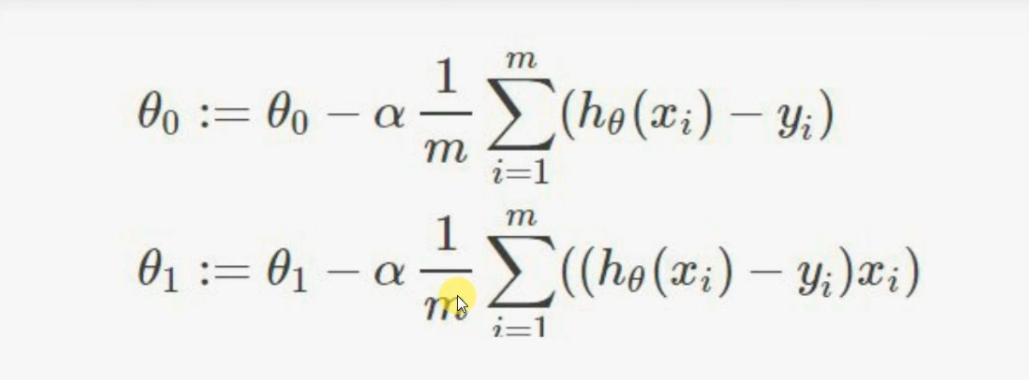

In [230]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read data

#data = pd.read_csv('ex1data1.txt', header=None)
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

# rescaling data
data = (data - data.mean()) / data.std()

# adding a new column called ones before the data
data.insert(0, 'Ones', 1)

# separate X (training data) from y (target variable) and creat theta 
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.matrix(np.zeros(cols-1))

# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)



# cost function
def computeCost(X, y, theta):
    H_x = X * theta.T #(m, n+1) x (n+1,1) > (m,1)
    z = np.power(((H_x) - y), 2)
#    print('z \n',z)
#    print('m ' ,len(X))
    return np.sum(z) / (2 * len(X))



# GD function
def gradientDescent(X, y, theta, alpha, iters):
    
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y #(m, n+1) x (n+1,1) > (m,1)
        theta = theta -  ((alpha / len(X)) * error.T * X )
        cost[i] = computeCost(X, y, theta)
      
    return theta, cost

# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
theta, cost = gradientDescent(X, y, theta, alpha, iters)

print('Final theta = ' , theta)
print('all cost  = ' , cost[0:50] )
print('final cost = ' , computeCost(X, y, theta))

Final theta =  [[8.33704037e-16 8.37833091e-01]]
all cost  =  [0.48800308 0.48129555 0.47472014 0.46827424 0.4619553  0.45576081
 0.44968833 0.44373545 0.43789982 0.43217912 0.4265711  0.42107354
 0.41568425 0.41040111 0.40522203 0.40014495 0.39516787 0.39028882
 0.38550587 0.38081712 0.37622072 0.37171485 0.36729772 0.3629676
 0.35872276 0.35456153 0.35048225 0.34648332 0.34256316 0.3387202
 0.33495293 0.33125987 0.32763954 0.32409052 0.3206114  0.3172008
 0.31385738 0.31057981 0.30736679 0.30421706 0.30112936 0.29810248
 0.29513521 0.29222639 0.28937486 0.2865795  0.28383919 0.28115285
 0.27851942 0.27593786]
final cost =  0.14744830407944606


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

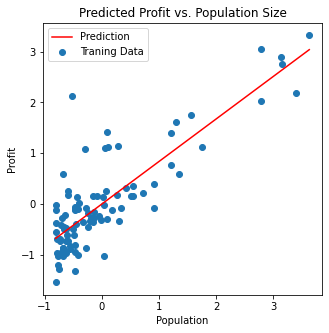

In [231]:
# get best fit line
#data = data * data.std() + data.mean()

x = np.linspace(data.Population.min(), data.Population.max(), 100)

f = theta[0, 0] + (theta[0, 1] * x)

# draw the line

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')



Text(0.5, 1.0, 'Error vs. Training Epoch')

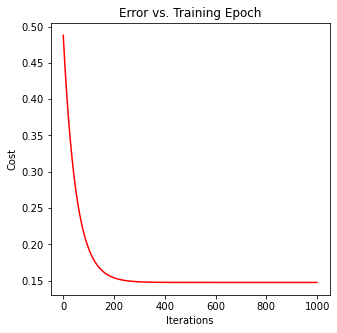

In [232]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

